In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sbn
from datetime import datetime
import math

df=pd.read_csv('data.csv')
data=df[df['shot_made_flag'].notnull()]

In [2]:
data.tail()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
30691,Driving Layup Shot,Layup,382,49900088,34.0443,0,0,-118.2698,7,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30692
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696
30696,Jump Shot,Jump Shot,471,49900088,33.9723,1,72,-118.2688,0,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30697


In [13]:
data.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

- shot_type:action_type,combined_shot_type,shot_type
- game_info:game_event_id,game_id,playoffs,season,team_id,team_name,game_date,match_up,opponent
- loc:lat,loc_x,loc_y,lon,shot_distance,shot_zone_area,shot_zone_basic,shot_zone_range
- time:minutes_remaining,period,seconds_remaining

First,we analyze the features of shot_type

In [3]:
data[['action_type', 'combined_shot_type', 'shot_type']].describe()

,action_type,combined_shot_type,shot_type
count,25697,25697,25697
unique,55,6,2
top,Jump Shot,Jump Shot,2PT Field Goal
freq,15836,19710,20285


In [4]:
data.groupby('combined_shot_type')['shot_made_flag'].mean()

combined_shot_type
Bank Shot    0.791667
Dunk         0.928030
Hook Shot    0.535433
Jump Shot    0.391071
Layup        0.565093
Tip Shot     0.348684
Name: shot_made_flag, dtype: float64

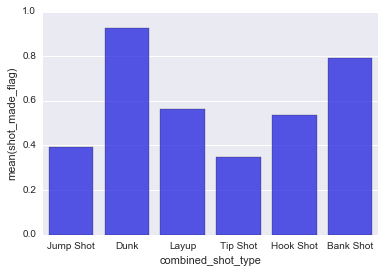

In [5]:
sbn.barplot(x='combined_shot_type', y='shot_made_flag', data=data, ci=None, color='blue',
            alpha=0.75)

- check if the data shot_type is useful
- compare with the data if we use the distance directly

In [6]:
data.groupby('shot_type')['shot_made_flag'].mean()

shot_type
2PT Field Goal    0.477348
3PT Field Goal    0.329268
Name: shot_made_flag, dtype: float64

In [7]:
data['distance']=np.sqrt(data['loc_x']*data['loc_x']+data['loc_y']*data['loc_y'])
data['3p']=0
data.ix[data['distance']>220,'3p']=1
data.groupby('3p')['shot_made_flag'].mean()

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Program Files (x86)\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

3p
0    0.479108
1    0.335147
Name: shot_made_flag, dtype: float64

- We can see that the accuracy calculated directly by the distance is almost the same as the the accuracy calculated by the shot type. So I will use distance instead of 'shot_type'

Next, we analyze the distance data.

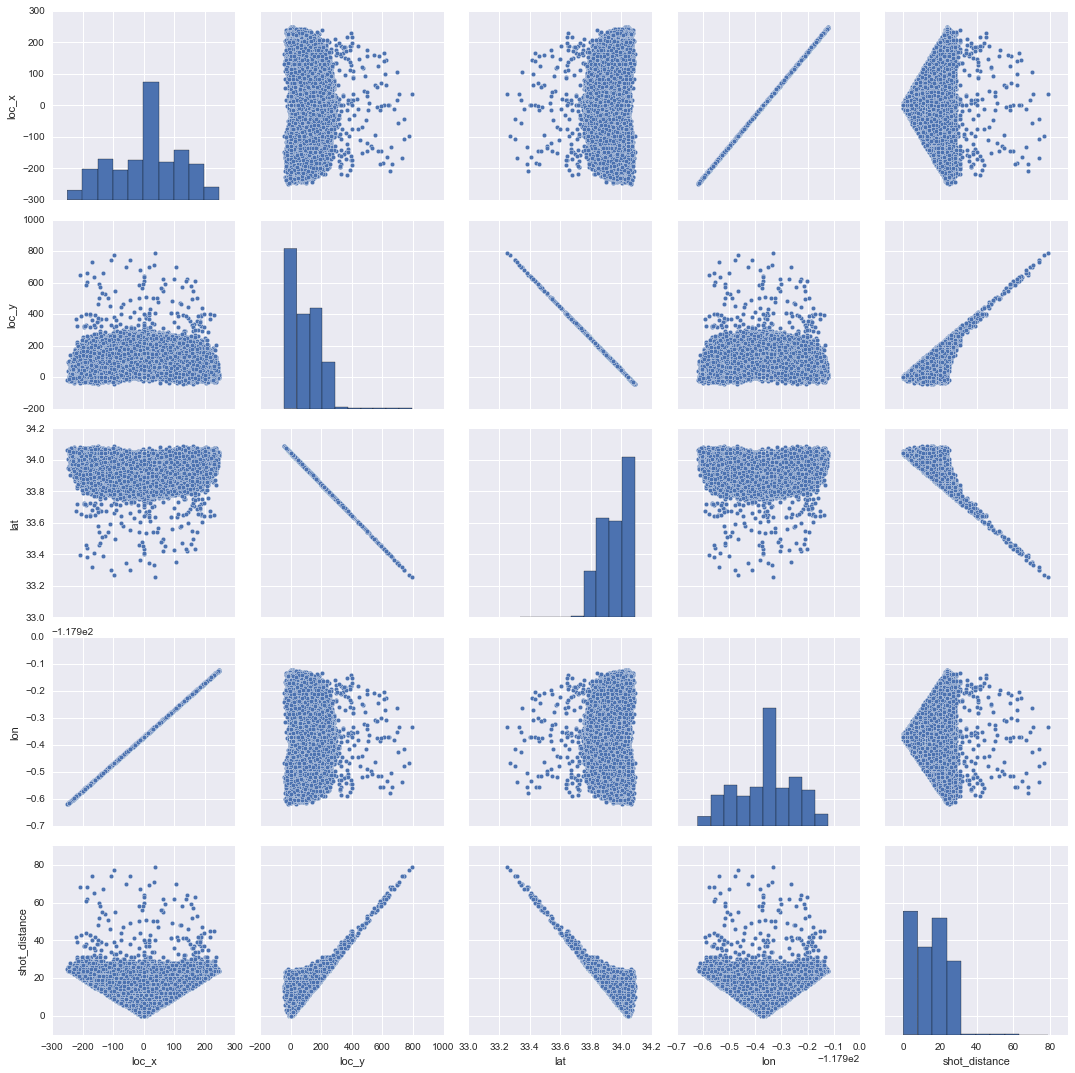

In [4]:
sbn.pairplot(data, vars=['loc_x', 'loc_y', 'lat', 'lon', 'shot_distance'], size=3)

- lon and lat are perfectly correlated with loc_x and loc_y. And according to common sense. The latitude and longtitude have little impact on the shot accuracy. So we will drop these two variables here.

In [8]:
data['range']=0
data.ix[data['distance']<80,'range']=1
data.ix[(data['distance']>=80) & (data['distance']<160),'range']=2
data.ix[(data['distance']>=160) & (data['distance']<240),'range']=3
data.ix[data['distance']>=240,'range']=4
data.groupby('range')['shot_made_flag'].mean()

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Program Files (x86)\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


range
1    0.573157
2    0.435686
3    0.397636
4    0.326276
Name: shot_made_flag, dtype: float64

In [9]:
data.groupby('shot_zone_range')['shot_made_flag'].mean()

shot_zone_range
16-24 ft.          0.401766
24+ ft.            0.332513
8-16 ft.           0.435484
Back Court Shot    0.013889
Less Than 8 ft.    0.573120
Name: shot_made_flag, dtype: float64

In [10]:
data[['shot_zone_basic','shot_zone_area','shot_zone_range']].describe()

,shot_zone_basic,shot_zone_area,shot_zone_range
count,25697,25697,25697
unique,7,6,5
top,Mid-Range,Center(C),Less Than 8 ft.
freq,10532,11289,7857


In [11]:
data['shot_zone_area'].unique(),data['shot_zone_basic'].unique(),data['shot_zone_range'].unique()

(array(['Left Side(L)', 'Left Side Center(LC)', 'Right Side Center(RC)',
        'Center(C)', 'Right Side(R)', 'Back Court(BC)'], dtype=object),
 array(['Mid-Range', 'Restricted Area', 'In The Paint (Non-RA)',
        'Above the Break 3', 'Right Corner 3', 'Backcourt', 'Left Corner 3'], dtype=object),
 array(['8-16 ft.', '16-24 ft.', 'Less Than 8 ft.', '24+ ft.',
        'Back Court Shot'], dtype=object))

- for these 3 features, shot_zone_range as well as shot_zone_basic can be repalced by the distance data according to our calculation.
- we need to include shot_zone_basic, because as we know in KOBE's career, he shot mostly in the right side and the accuracy is higher.

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


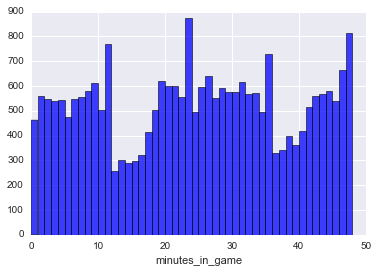

In [12]:
data['minutes_in_game'] = np.where(data['period'] < 5, 
                                   data['period'] * 12 - data['minutes_remaining'] - 1,
                                   48 + 5 *(data['period'] - 4) - data['minutes_remaining'] - 1)
sbn.distplot(data['minutes_in_game'],color='blue', bins=list(range(0, 49)), kde=False, hist_kws={'linewidth': 0.75, 'alpha': 0.75})


D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<Container object of 47 artists>

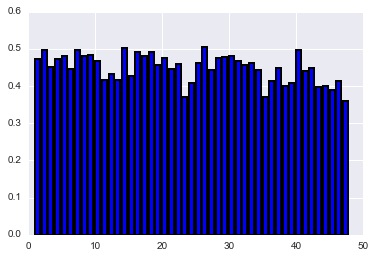

In [13]:
data['minutes_in_game'] = np.where(data['period'] < 5, 
                                   data['period'] * 12 - data['minutes_remaining'] - 1,
                                   48 + 5 *(data['period'] - 4) - data['minutes_remaining'] - 1)
ac=data.groupby('minutes_in_game')['shot_made_flag'].mean().reset_index()
plt.bar(ac.ix[1:47,'minutes_in_game'],ac.ix[1:47,'shot_made_flag'],width=0.75,color='blue',aa=False)

In [14]:
data['is_last_minute']=data['minutes_in_game'].map(lambda x: x%12==0)

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


- on average, the accuracy of different quarter are very similar. However, we find that the accuracy of the last minutes of every quarter are always low. So we generate a variable to indicate that.

<Container object of 48 artists>

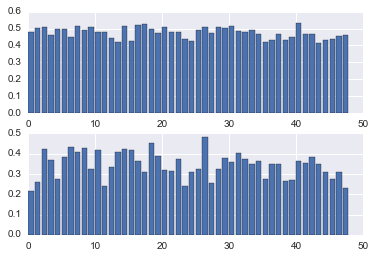

In [15]:
ax1=plt.subplot(211)
ax2=plt.subplot(212)
a=data.groupby(['minutes_in_game','shot_type'])['shot_made_flag'].mean().reset_index()
ax1.bar(a.loc[(a['shot_type']=='2PT Field Goal') & (a['minutes_in_game']<=47),'minutes_in_game'],a.loc[(a['shot_type']=='2PT Field Goal') & (a['minutes_in_game']<=47),'shot_made_flag'])
ax2.bar(a.loc[(a['shot_type']=='3PT Field Goal') & (a['minutes_in_game']<=47),'minutes_in_game'],a.loc[(a['shot_type']=='3PT Field Goal') & (a['minutes_in_game']<=47),'shot_made_flag'])

- game info
- the accuracy differs a lot between different seasons because of his own condition. And in the last several seasons, the accuracies are lower. So we generate a new variable age.

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


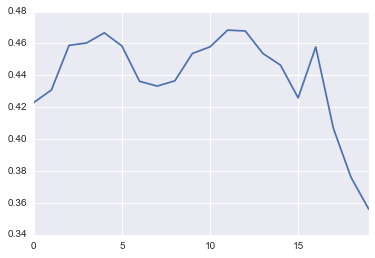

In [16]:
ac_season=data.groupby('season')['shot_made_flag'].mean().reset_index()
birthdate = datetime(1978, 8, 23)
data["game_date"] = data["game_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
data['age'] = data['game_date'].apply(lambda x: (x - birthdate).days/365.25)
ac_season['shot_made_flag'].plot()

In [17]:
def home(matchup):
    if 'LAL @' in matchup:
        return 0
    else:
        return 1
    
data["home_game"] = data["matchup"].apply(home)
accuracyHome = data.groupby(['home_game', 'shot_type'])['shot_made_flag'].mean().unstack()
accuracyHome

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


shot_type,2PT Field Goal,3PT Field Goal
home_game,,
0,0.470343,0.315480
1,0.484599,0.345115


In [18]:
playoff = data.groupby(['playoffs', 'shot_type'])['shot_made_flag'].mean().unstack()
playoff

shot_type,2PT Field Goal,3PT Field Goal
playoffs,,
0,0.477936,0.329908
1,0.473981,0.325236


- some other factors
- whether the previous shot was made
- the distance from home

In [19]:
data_shot=data[['shot_made_flag','shot_id','game_id','shot_type']]
data_shot_pre=data_shot.copy(deep=True)

In [20]:
data_shot_pre['shot_id']=data_shot_pre['shot_id']+1
tmp=pd.merge(data_shot,data_shot_pre,on='shot_id',how='inner',suffixes=('_this','_pre'))
tmp=tmp[tmp['game_id_this']==tmp['game_id_pre']]
tmp.groupby(['shot_type_pre','shot_made_flag_pre'])['shot_made_flag_this'].mean()

shot_type_pre   shot_made_flag_pre
2PT Field Goal  0.0                   0.455016
                1.0                   0.447185
3PT Field Goal  0.0                   0.440454
                1.0                   0.405837
Name: shot_made_flag_this, dtype: float64

In [23]:
data['previous_shot_type'] = data.groupby('game_id')['shot_type'].shift(1)
data['previous_shot_made'] = data.groupby('game_id')['shot_made_flag'].shift(1)

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
LAL=data.loc[data['home_game']==1,['lat','lon']].mean()
def deg2rad(deg):
    return deg * (math.pi/180)
def getDistanceFromLatLonInKm(x):
    lat1=LAL[0]
    lon1=LAL[1]
    lat2=x['lat']
    lon2=x['lon']
    R = 6371
    dLat = deg2rad(lat2-lat1)
    dLon = deg2rad(lon2-lon1)
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(deg2rad(lat1)) * math.cos(deg2rad(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    return d
data['distance_from_staples'] = data.apply(getDistanceFromLatLonInKm, axis=1)

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


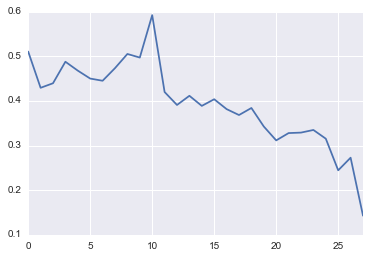

In [34]:
data['distance_from_staples']=data['distance_from_staples'].map(lambda x:int(x))
tmp=data.groupby('distance_from_staples')['shot_made_flag'].mean().reset_index()
tmp.loc[tmp['distance_from_staples']<28,'shot_made_flag'].plot()

- shot_type:action_type,combined_shot_type
- game_info:season,opponent,home_game
- loc:loc_x,loc_y,shot_distance,shot_zone_area
- time:is_last_minute
- other:age,previous_shot_type,previous_shot_made,distance_from_staples

In [24]:
data_final=data[['action_type','combined_shot_type','season','opponent','home_game','loc_x','loc_y',
      'shot_distance','shot_zone_area','is_last_minute','age','previous_shot_type',
      'previous_shot_made','distance_from_staples']]
data_train_final = pd.get_dummies(data_final, columns=['action_type', 'combined_shot_type','opponent',
                                           'season', 'shot_zone_area', 'opponent',
                                           'previous_shot_type', 'previous_shot_made'])
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score

X_train,X_test,y_train,y_test=train_test_split(data_train_final,data['shot_made_flag'],test_size=0.3,random_state=1)


- try different models

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=8)
clf.fit(X_train,y_train)
clf_train_pred,clf_test_pred=clf.predict(X_train),clf.predict(X_test)
print('RandomRorest\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_train,clf_train_pred),
accuracy_score(y_test,clf_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_train,clf_train_pred),mean_squared_error(y_test,clf_test_pred)))
feature_imp = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=["importance"])
feat_imp_10 = feature_imp.sort_values("importance", ascending=False).head(10).index

RandomRorest
Train Accuracy: 0.962 Test Accuracy:0.641
Train MSE: 0.038 Test MSE: 0.359


In [39]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()
log_model.fit(X_train,y_train)
log_model_train_pred,log_model_test_pred=log_model.predict(X_train),log_model.predict(X_test)

print('LogisticRegression\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_train,log_model_train_pred),
accuracy_score(y_test,log_model_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_train,log_model_train_pred),mean_squared_error(y_test,log_model_test_pred)))


LogisticRegression
Train Accuracy: 0.683 Test Accuracy:0.682
Train MSE: 0.317 Test MSE: 0.318


In [43]:
from sklearn import neighbors

knn=neighbors.KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_train_pred,knn_test_pred=knn.predict(X_train),knn.predict(X_test)

print('KNN\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_train,knn_train_pred),
accuracy_score(y_test,knn_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_train,knn_train_pred),mean_squared_error(y_test,knn_test_pred)))

KNN
Train Accuracy: 0.723 Test Accuracy:0.567
Train MSE: 0.277 Test MSE: 0.433


In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_train_pred,ada_test_pred=ada.predict(X_train),ada.predict(X_test)

print('ada\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_train,ada_train_pred),
accuracy_score(y_test,ada_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_train,ada_train_pred),mean_squared_error(y_test,ada_test_pred)))

ada
Train Accuracy: 0.683 Test Accuracy:0.681
Train MSE: 0.317 Test MSE: 0.319


- add the data we drop, the performance does not get better

In [38]:
data_final=data[['action_type','combined_shot_type','season','opponent','home_game','loc_x','loc_y',
      'shot_distance','shot_zone_area','is_last_minute','age','previous_shot_type',
      'previous_shot_made','distance_from_staples','shot_zone_basic','shot_zone_range','shot_type','lat','lon',
               'minutes_remaining','period','seconds_remaining']]
data_train_final = pd.get_dummies(data_final, columns=['action_type', 'combined_shot_type','opponent',
                                           'season', 'shot_zone_area', 'opponent',
                                           'previous_shot_type', 'previous_shot_made','shot_zone_basic','shot_zone_range','shot_type'])
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data_train_final,data['shot_made_flag'],test_size=0.3,random_state=1)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=8)
clf.fit(X_train,y_train)
clf_train_pred,clf_test_pred=clf.predict(X_train),clf.predict(X_test)
print('RandomRorest\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_train,clf_train_pred),
accuracy_score(y_test,clf_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_train,clf_train_pred),mean_squared_error(y_test,clf_test_pred)))
feature_imp = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=["importance"])
feat_imp_10 = feature_imp.sort_values("importance", ascending=False).head(10).index

RandomRorest
Train Accuracy: 0.969 Test Accuracy:0.643
Train MSE: 0.031 Test MSE: 0.357


In [ ]:
from sklearn.svm import SVC

SVM_model=SVC(kernel='linear',random_state=0,C=1)
SVM_model.fit(X_train,y_train)
SVM_model_train_pred,SVM_model_test_pred=SVM_model.predict(X_train),SVM_model.predict(X_test)

print('SVM_model\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_train,SVM_model_train_pred),
                                                            accuracy_score(y_test,SVM_model_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_train,SVM_model_train_pred),mean_squared_error(y_test,SVM_model_test_pred)))